#Challenge

In [ ]:
# If additional packages are needed but are not installed by default, uncomment the last two lines of this cell
# and replace <package list> with a list of additional packages.
# This will ensure the notebook has all the dependencies and works everywhere

#import sys
#!{sys.executable} -m pip install <package list>

In [ ]:
import sys
!{sys.executable} -m pip install wget
!{sys.executable} -m pip install shutil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=26d851d3ba786483a21c29ea363eff29399eb76289b6a6502946f68a7211f823
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement shutil (from versions: none)
ERROR: No matching distribution found for shutil


In [ ]:
# Libraries
import pandas as pd
import os
from shutil import unpack_archive
pd.set_option("display.max_columns", 101)

## Dataset

In [ ]:
# Run this cell block to download and extract image data
!wget 'https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/8c7bc0c59ee6bcdb3646a1997606a9d0/test.zip'
!wget 'https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/ffe8804da24b94ee410a8730ba297dfc/train_0.zip'
!wget 'https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/5460fcc87e2d7f7e19c17f719e0df00a/train_1.zip'

print('Extracting Train Dataset : Label 1')
unpack_archive('train_1.zip', '')

print('Extracting Train Dataset : Label 0')
unpack_archive('train_0.zip', '')

print('Extracting Test Dataset')
unpack_archive('test.zip', '')

print('Dataset Extracted')


os.remove('train_1.zip')
os.remove('train_0.zip')
os.remove('test.zip')
print('Extra Files Removed')

--2022-06-21 13:33:30--  https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/8c7bc0c59ee6bcdb3646a1997606a9d0/test.zip
Resolving hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)... 52.217.17.244
Connecting to hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)|52.217.17.244|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58948996 (56M) [application/zip]
Saving to: ‘test.zip’

test.zip            100%[===================>]  56.22M  30.5MB/s    in 1.8s    

2022-06-21 13:33:33 (30.5 MB/s) - ‘test.zip’ saved [58948996/58948996]

--2022-06-21 13:33:33--  https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/ffe8804da24b94ee410a8730ba297dfc/train_0.zip
Resolving hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)... 52.217.236.113
Connecting to hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)|52.217.236.113|:443... co

## Data Description

Column | Description
:---|:---
`file` | Image name
`label` | Target Label (1/0)

In [ ]:
# The train label dataset is already loaded below
data = pd.read_csv("train_labels.csv")

In [ ]:
data.head()

,file,label
0,img_44733.jpg,1.0
1,img_72999.jpg,1.0
2,img_25094.jpg,1.0
3,img_69092.jpg,1.0
4,img_92629.jpg,1.0


In [ ]:
from sklearn.model_selection import train_test_split

train_0_dir = os.path.join('/content/train/0')
train_1_dir = os.path.join('/content/train/1')
tr_dir = os.path.join('/content/tr')
val_dir = os.path.join('/content/val')

os.mkdir(tr_dir)
os.mkdir(val_dir)

t0 = os.path.join(tr_dir, '0')
t1 = os.path.join(tr_dir, '1')
v0 = os.path.join(val_dir, '0')
v1 = os.path.join(val_dir, '1')

os.mkdir(t0)
os.mkdir(t1)
os.mkdir(v0)
os.mkdir(v1)

tr_0_dir, val_0_dir = train_test_split(os.listdir(train_0_dir), test_size = 0.40)
tr_1_dir, val_1_dir = train_test_split(os.listdir(train_1_dir), test_size = 0.40)

In [ ]:
import shutil
for file in tr_0_dir:
    shutil.copy(os.path.join(train_0_dir, file), os.path.join(t0, file))
for file in val_0_dir:
    shutil.copy(os.path.join(train_0_dir, file), os.path.join(v0,file))
    
for file in tr_1_dir:
    shutil.copy(os.path.join(train_1_dir,file), os.path.join(t1,file))
for file in val_1_dir:
    shutil.copy(os.path.join(train_1_dir,file), os.path.join(v1,file))

train_0_names = os.listdir(train_0_dir)
print(train_0_names[:10])

train_1_names = os.listdir(train_1_dir)
print(train_1_names[:10])

['img_5741.jpg', 'img_4690.jpg', 'img_8300.jpg', 'img_53265.jpg', 'img_20363.jpg', 'img_57207.jpg', 'img_76958.jpg', 'img_12011.jpg', 'img_46111.jpg', 'img_36872.jpg']
['img_92256.jpg', 'img_48175.jpg', 'img_37676.jpg', 'img_73423.jpg', 'img_63634.jpg', 'img_59936.jpg', 'img_32257.jpg', 'img_33009.jpg', 'img_37094.jpg', 'img_68261.jpg']


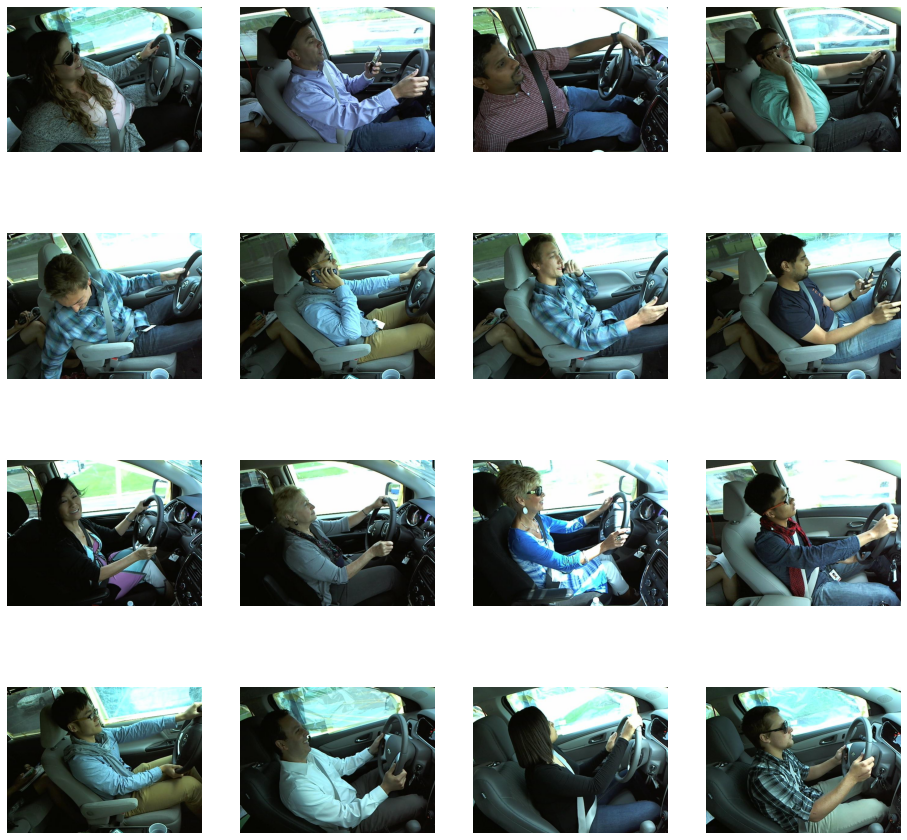

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_0_pix = [os.path.join(train_0_dir, fname) 
              for fname in train_0_names[pic_index-8:pic_index]]
next_1_pix = [os.path.join(train_1_dir, fname) 
              for fname in train_1_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_0_pix+next_1_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Machine Learning

Build a neural network that can classify the driver’s behaviour.
- **The model's performance will be evaluated on the basis of accuracy.**

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.optimizers import RMSprop

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
    )

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
    )

            

In [ ]:
train_generator = train_datagen.flow_from_directory(
    tr_dir,
    target_size=(160,120),
    batch_size= 20,
    class_mode='binary',
    shuffle=True
    )

val_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size = (160,120),
    batch_size = 20,
    class_mode = 'binary',
    shuffle=True
    )

Found 2408 images belonging to 2 classes.
Found 1607 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (160,120,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model.summary()
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])
            

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 158, 118, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 79, 59, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 77, 57, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 38, 28, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 36, 26, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 18, 13, 128)     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 30, 
    epochs = 30,
    validation_data = val_generator,
    validation_steps = 50, 
    verbose =1)

Epoch 1/30
30/30 [==============================] - 48s 2s/step - loss: 0.6946 - accuracy: 0.5100 - val_loss: 0.6878 - val_accuracy: 0.5830
Epoch 2/30
30/30 [==============================] - 46s 2s/step - loss: 0.6916 - accuracy: 0.5200 - val_loss: 0.6845 - val_accuracy: 0.6180
Epoch 3/30
30/30 [==============================] - 45s 2s/step - loss: 0.6819 - accuracy: 0.5667 - val_loss: 0.6795 - val_accuracy: 0.5520
Epoch 4/30
30/30 [==============================] - 43s 1s/step - loss: 0.6845 - accuracy: 0.5683 - val_loss: 0.6677 - val_accuracy: 0.6390
Epoch 5/30
30/30 [==============================] - 43s 1s/step - loss: 0.6609 - accuracy: 0.6200 - val_loss: 0.6430 - val_accuracy: 0.6590
Epoch 6/30
30/30 [==============================] - 48s 2s/step - loss: 0.6343 - accuracy: 0.6567 - val_loss: 0.6150 - val_accuracy: 0.6830
Epoch 7/30
30/30 [==============================] - 46s 2s/step - loss: 0.6212 - accuracy: 0.6717 - val_loss: 0.5648 - val_accuracy: 0.7380
Epoch 8/30
30/30 [==

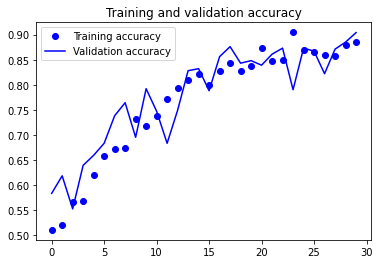

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))


plt.plot(epochs, acc, 'bo', label='Training accuracy') 
plt.plot(epochs, val_acc, 'b', label='Validation accuracy') 
plt.title('Training and validation accuracy')

plt.legend()


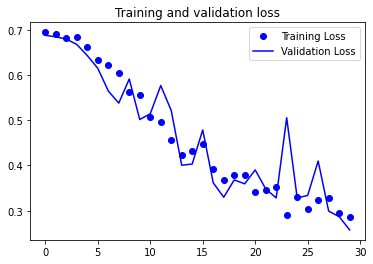

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each image in the test folder, predict the value of the label (0/1). You should submit a CSV file with a header row and one row per test entry. 

The file (`submissions.csv`) should have exactly 2 columns:
   - **file**
   - **label**
   

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

test_dir= os.path.join('/content/test')
test_names = os.listdir(test_dir)

result = [['file','label']]

for fn in test_names:

  # skip .DS_Store file
  if fn == '.DS_Store':
    continue

  # predicting images
  path = '/content/test/' + fn
  print(path)
  img = image.load_img(path, target_size=(160, 120))
  x = image.img_to_array(img)
  x = x / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  # write result to csv
  row = []
  row.append(fn)

  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is labeled with 1")
    row.append('1')
  else:
    print(fn + " is labeled with 0")
    row.append('0')
  print(row)
  result.append(row)
  plt.show()

print()

Output streaming akan dipotong hingga 5000 baris terakhir.
[0.02714166]
img_33108.jpg is labeled with 0
['img_33108.jpg', '0']
/content/test/img_7608.jpg
[0.9098996]
img_7608.jpg is labeled with 1
['img_7608.jpg', '1']
/content/test/img_17359.jpg
[0.9831934]
img_17359.jpg is labeled with 1
['img_17359.jpg', '1']
/content/test/img_84279.jpg
[0.7719789]
img_84279.jpg is labeled with 1
['img_84279.jpg', '1']
/content/test/img_18847.jpg
[0.8966663]
img_18847.jpg is labeled with 1
['img_18847.jpg', '1']
/content/test/img_67971.jpg
[0.00859368]
img_67971.jpg is labeled with 0
['img_67971.jpg', '0']
/content/test/img_82344.jpg
[0.6682744]
img_82344.jpg is labeled with 1
['img_82344.jpg', '1']
/content/test/img_4733.jpg
[0.9712651]
img_4733.jpg is labeled with 1
['img_4733.jpg', '1']
/content/test/img_15696.jpg
[0.9850837]
img_15696.jpg is labeled with 1
['img_15696.jpg', '1']
/content/test/img_98853.jpg
[0.8888587]
img_98853.jpg is labeled with 1
['img_98853.jpg', '1']
/content/test/img_12144

In [ ]:
print(result[:10])

[['file', 'label'], ['img_609.jpg', '1'], ['img_71529.jpg', '0'], ['img_58762.jpg', '0'], ['img_60616.jpg', '0'], ['img_2064.jpg', '1'], ['img_2020.jpg', '0'], ['img_13325.jpg', '0'], ['img_13683.jpg', '1'], ['img_33460.jpg', '0']]


In [ ]:
submission_df = pd.DataFrame(result)

In [ ]:
#Submission
submission_df.to_csv('submissions.csv',index=False)